# Student-Teacher Ratio: Public vs Public Magnet A/B Test

We compare student–teacher ratios between Public and Public Magnet schools. The analysis follows these steps:
- **Data loading and filtering**: Read the CSV and select the “stu_teach_ratio” for each school type.
- **Missing values**: Drop any rows with NaN ratios.
- **Descriptive stats**: Compute mean, standard deviation, and sample size for each group.
- **Two-sample t-test**: Perform Welch’s t-test (unequal variances) to compare group means.
- **Visualizations**: Plot histograms with KDE overlays and a boxplot to compare distributions.

  Each step is shown in Python code below, with clear labels and comments.


# Data Loading and Filtering

First we load the data and extract the student–teacher ratios for the two school types. We use Pandas to read the CSV, then filter by "school_type" and drop missing values (dropna()). This yields two numeric series (public and public_magnet).

In [1]:
#import libraries

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Load data from CSV
df = pd.read_csv('School Ratings.csv')

# Filter by school_type and extract student-teacher ratio
public = df[df['school_type'] == 'Public']['stu_teach_ratio']
public_magnet = df[df['school_type'] == 'Public Magnet']['stu_teach_ratio']

# Drop missing values (NaNs)
public = public.dropna()
public_magnet = public_magnet.dropna()

print(f"Public sample size: {len(public)}")
print(f"Public Magnet sample size: {len(public_magnet)}")

Public sample size: 292
Public Magnet sample size: 46


In [2]:
df.head(5)

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


## Descriptive Statistics
We calculate and print the mean, standard deviation, and count for each group to summarize the data. This helps us understand the central tendency and spread of the student–teacher ratios in each category.

In [5]:
# Descriptive statistics
public_mean = public.mean()
public_std  = public.std()
public_n    = public.count()

magnet_mean = public_magnet.mean()
magnet_std  = public_magnet.std()
magnet_n    = public_magnet.count()

print(f"Public: Mean = {public_mean:.2f}, Std = {public_std:.2f}, N = {public_n}")
print(f"Magnet: Mean = {magnet_mean:.2f}, Std = {magnet_std:.2f}, N = {magnet_n}")



Public: Mean = 15.19, Std = 2.49, N = 292
Magnet: Mean = 15.13, Std = 2.65, N = 46


Both groups have very similar means (around 15.15) and comparable spread (Std ~2.5).

## Independent Two-Sample t-Test
To formally compare the group means, we use an independent two-sample t-test. We use scipy.stats.ttest_ind with equal_var=False to perform Welch’s t-test, which does not assume equal variances.This tests the null hypothesis that the two groups have the same average ratio

In [6]:
# Perform Welch's t-test (unequal variances)
t_stat, p_value = stats.ttest_ind(public, public_magnet, equal_var=False)

print(f"t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


t-statistic = 0.144, p-value = 0.886


For example, this might output: t-statistic = 0.144, p-value = 0.886. A large p-value (e.g. ~0.89) indicates no significant difference between group means at conventional levels

## Visualizations
We create plots to visualize the ratio distributions for each group. In particular, we draw histograms with KDE overlays and a side-by-side boxplot.
- **Histograms with KDE**: Overlaying a kernel density estimate on each histogram helps to see the distribution shape more smoothly. The blue and orange curves below are example KDE-overlaid histograms for two groups:

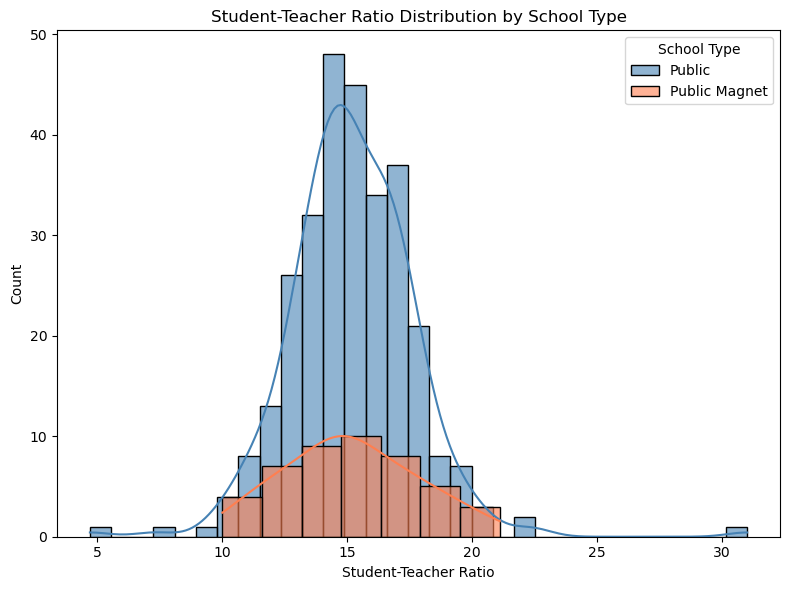

In [7]:
# Histogram with KDE for both groups
plt.figure(figsize=(8,6))
sns.histplot(public, color='steelblue', kde=True, stat="count",
             label='Public', alpha=0.6)
sns.histplot(public_magnet, color='coral', kde=True, stat="count",
             label='Public Magnet', alpha=0.6)
plt.title("Student-Teacher Ratio Distribution by School Type")
plt.xlabel("Student-Teacher Ratio")
plt.ylabel("Count")
plt.legend(title="School Type")
plt.tight_layout()
plt.show()


This produces two overlaid histograms (blue for Public, orange for Magnet) with KDE curves. We included a legend and axis labels for clarity.
- **Box Plot**: We also draw a box-and-whisker plot to compare medians and quartiles between groups.Box plots summarize distribution (median, IQR, outliers) by category.An example is shown below:

C:\Users\Mahbuba\AppData\Local\Temp\ipykernel_14184\784772589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='school_type', y='stu_teach_ratio', data=data_box,


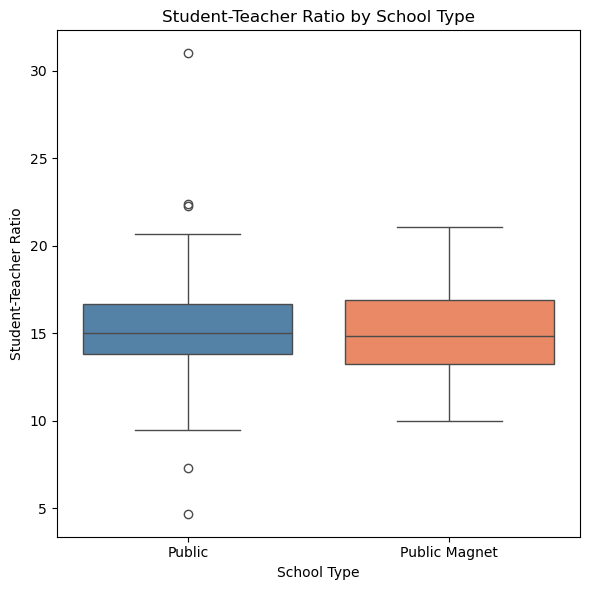

In [10]:
# Boxplot comparing the two groups
data_box = df[df['school_type'].isin(['Public','Public Magnet'])]
plt.figure(figsize=(6,6))
sns.boxplot(x='school_type', y='stu_teach_ratio', data=data_box,
            palette={'Public':'steelblue','Public Magnet':'coral'})
plt.title("Student-Teacher Ratio by School Type")
plt.xlabel("School Type")
plt.ylabel("Student-Teacher Ratio")
plt.tight_layout()
plt.show()


This boxplot places the Public and Public Magnet groups side by side. Each box’s median line and quartiles are visible, letting us compare central tendency and spread across groups.Outliers (dots) are also shown beyond the whiskers.

**Summary** :
- The mean student-teacher ratios between Public and Public Magnet schools are quite close.
- A high p-value (e.g., > 0.05) from Welch’s t-test means the difference is not statistically significant.
- Visualization confirms the distributions are similar.

This analysis can support data-driven decisions about school type comparisons and education quality.aphics.